# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

## Book 1: EDA

Author: Patrick Smith

Date: 24/03/2024

Contact: patrick.b.smith@gmail.com

     ~~~             |
~~~~     ~~~~      -----                    |
     ~~~           )___(                  -----
                     |                    )___(
                 ---------                  |
                /         \              -------
               /___________\            /       \
                     |                 /_________\
              ---------------               |
             /               \        -------------
            /                 \      /             \
           /___________________\    /_______________\
         ____________|______________________|__________
          \_                                        _/
            \______________________________________/
     ~~..             ...~~~.           ....~~~...     ..~

## Exploring Global and Cultural Origins

## Questions to Get You Thinking:

### #1: What percentage of the global population lives outside their country of birth? How does the UK compare?

### #2: Where do fish and chips come from?

### #3: The British are known for their tea. Where did tea originate from?


## Answers:

### #1: 3.6%

Usually people guess much higher. The fact is that there are many closed off countries than the average person expects, especially those from North America or Western Europe. 

The UK, with its rich history of immigration, stands as a prime example of a diverse and multicultural society shaped significantly by its immigrant population.

### #2: Jewish Refugees from Portugal

2: The Origins of Fish and Chips

Question: What are the origins of fish and chips?
Context: Fish and chips, a quintessential British dish, surprisingly has its roots elsewhere. Introduced by  Jewish refugees from Portugal in the 16th century, this dish has evolved into a national staple in the UK. The refugees brought with them the tradition of frying fish, which later merged with chips (fried potatoes), a popular food among the working class in Britain. This culinary fusion has since become a beloved symbol of British food culture.

### #3: East Asia (mostly China)

3: The British Tea Tradition

Question: Where did tea, a staple of British culture, originate from?
Answer: Although tea is synonymous with British culture, it originally comes from East Asia, primarily China. It was introduced to Britain in the 17th century by the East India Company and has since become a deeply ingrained part of British culture, influencing social habits and becoming a national symbol.



### Population of the United Kingdom 1971-2021


|                | 1971  | 1981  | 1991  | 2001  | 2011  | 2021  | 2031E  |
|----------------|-------|-------|-------|-------|-------|-------|-------|
| All People     | 52.6M | 53.6M | 54.9M | 57.1M | 63.3M | 67.0M | 72.3M |
| Born Abroad    | 3.2M  | 3.4M  | 3.8M  | 4.9M  | 8.0M  | 9.5M  | 10.3M |
| % T            | 6.08% | 6.34% | 6.92% | 8.58% | 12.64%| 14.18%| 8.00%|
| % Δ Decade     | 24.0%  | 7.5%  | 11.8%  | 27.7% | 63.0% | 18.8% | 15.00%|


## Table of Contents

[Inital Discovery/Problem Solving](#discovery)

[Data Manipulation](#wrangle)

[Initial Description](#Exploratory_Data_Analysis) 

[Discovery and Cleaning](#Discovery)

[Observation 1: Reviewer_Score](#Reviewer_Score)

[Observation 2: Average_Score](#Average_Score)

[Observation 3: Case_Outcome](#Case_Outcome)

[Observation 4: Decisions and Grants](#Decisions_Grants)

[Observation 5: Return Type and Group](#Return_Type)

[Observation 6: Applications](#Applications)

[Observation 7: Host Country](#Host_Country)

[Observation 8: Industry and Jobs](#Industry_Jobs)

[Observation 9: Cases and Visas](#Cases)

[Observation 10: Initial EDA Conclusion and Forward](#EDA_Forward)

## Description of Variables


| Column                     | Descriptor                                                                 | Datatype |
|----------------------------|----------------------------------------------------------------------------|----------|
| Year                       | Year of observation.                                                       | int32    |
| Quarter                    | Quarter of observation (Q1=1,Q2=2,Q3=3,Q4=4).                              | object   |
| Nationality                | Nationality of individual.                                                 | object   |
| Region                     | Region of observation.                                                     | object   |
| Return type group          | Type of return.                                                            | object   |
| Return type                | Specific type of return (details not initially provided, adding for consistency). | object   |
| Age                        | Age of individual, outputted in ranges (e.g., 18+).                       | object   |
| Sex                        | Gender of individual with values for male, female, and other/unknown.      | int32    |
| Return destination group   | Destination of return.                                                     | object   |
| Number of returns          | Count of returns.                                                          | float64  |
| Visa type group            | Type of visa the individual is applying to.                                | object   |
| Applicant type             | Type of applicant.                                                         | object   |
| Case outcome               | Outcome of case. This is the dependent variable. (Issued/Rejected/Withdrawal/Resettlement). | object   |
| Decisions                  | Number of decisions made.                                                  | float64  |
| Case type                  | Type of case.                                                              | object   |
| Case outcome group         | Group of case outcome.                                                     | object   |
| UASC                       | Indicates if the applicant is an Unaccompanied Asylum-Seeking Child. Added for consistency. | object   |
| Host Country               | Country of host, similar to Nationality.                                   | object   |
| Application type group     | Type of application grouped.                                               | object   |
| Application type           | Type of application.                                                       | object   |
| Grants                     | Number of grants.                                                          | float64  |
| Location of application    | Location where the application was submitted. Added for completeness.      | object   |
| Applications               | Number of applications.                                                    | float64  |
| Occupation                 | Occupation of individual.                                                  | object   |
| Industry                   | Industry of individual.                                                    | object   |
| Occ. major group           | Major group classification of the occupation. Added for completeness.      | object   |
| Occ. sub-major group       | Sub-major group classification of the occupation. Added for completeness.  | object   |
| Occ. minor group           | Minor group classification of the occupation. Added for completeness.      | object   |
| Occ. unit group            | Unit group classification of the occupation. Added for completeness.       | object   |
| Sex_Male                   | Male dummy set to 1-0.                                                     | object   |
| Sex_Female                 | Female dummy set to 1-0.                                                   | object   |
| Sex_Other                  | Other or NAs dummy set to 1-0.                                             | object   |

# Importing Libraries

In [34]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

## Initial Objective

We are going to complete the following:

1) Read the file
2) Do an initial investigation
3) Clean the data (data wrangling)
4) Do an EDA (exploratory data analysis)
5) Plots and univariate and bivariate distribution
6) Insights and conclusions to shareholders

After, we will move on to data preprocessing and modelling on the other notebook.

<a id = 'wrangle'><a/>

## Data Loading & Merging Pathway:

### Data Collection

Data was collected from an official UK government website. The detailed records span several departments, with the filenames listed below:

- `1_returns-datasets-dec-2023.xlsx`
- `2_entry-clearance-visa-outcomes-datasets-dec-2023.xlsx`
- `3_entry-clearance-visa-outcomes-datasets-dec-2023_outcomes.xlsx`
- `4_asylum-applications-datasets-dec-2023.xlsx`
- `5_citizenship-datasets-dec-2023.xlsx`
- `6_citizenship-datasets-dec-2023_2.xlsx`
- `7_app_occupation-visas-datasets-dec-2023.xlsx`
- `8_grants_occupation-visas-datasets-dec-2023_2.xlsx`
- `9_app_extensions-datasets-dec-2023.xlsx`
- `10_grant_extensions-datasets-dec-2023.xlsx`
- `11_asylum-appeals-lodged-datasets-mar-2023.xlsx`
- `12_asylum-applications-awaiting-decision-datasets-dec-2023.xlsx`
- `13_migration-work-sponsorship-datasets-dec-2023.xlsx`
- `14_nation_migration-work-sponsorship-datasets-dec-2023.xlsx`
- `15_passengers-refused-entry-border-datasets-dec-2023.xlsx`

These datasets cover various timeframes and categories, with some files sharing similar columns while others span different date ranges, from 2001 to 2023. Files have been organized into 'Annual' and 'Quarterly' directories for streamlined analysis.

From oldest read data to new 1-2-3-4-5-6, data is pasted on top, so it is 6-5-4-3-2-1 unfiltered.

The code below takes approximately 1 minute to run.

In [35]:
# Define the directory path
directory_path = r"C:\Users\patri\Downloads\data\capstone\updated"

# Define the file names
returns_file_name = "1_returns-datasets-dec-2023.xlsx"  
entries_file_name = "2_entry-clearance-visa-outcomes-datasets-dec-2023.xlsx"
entries_outcomes_file_name = "3_entry-clearance-visa-outcomes-datasets-dec-2023_outcomes.xlsx"
asylum_file_name = "4_asylum-applications-datasets-dec-2023.xlsx"
app_citizenship_file_name = "5_citizenship-datasets-dec-2023.xlsx"
citizenship_file_name = "6_citizenship-datasets-dec-2023_2.xlsx"
app_jobs_file_name = "7_app_occupation-visas-datasets-dec-2023.xlsx"
grants_jobs_file_name = "8_grants_occupation-visas-datasets-dec-2023_2.xlsx"
app_ext_jobs_file_name = "9_app_extensions-datasets-dec-2023.xlsx"
app_ext_grant_jobs_file_name = "10_grant_extensions-datasets-dec-2023.xlsx"
asylum_appeals_file_name = "11_asylum-appeals-lodged-datasets-mar-2023.xlsx"
asylum_wait_file_name = "12_asylum-applications-awaiting-decision-datasets-dec-2023.xlsx"
sponsorship_jobs_file_name = "13_migration-work-sponsorship-datasets-dec-2023.xlsx"
nation_jobs_file_name = "14_nation_migration-work-sponsorship-datasets-dec-2023.xlsx"
refused_entry_file_name = "15_passengers-refused-entry-border-datasets-dec-2023.xlsx"

# Construct the full file paths
returns_file_path = os.path.join(directory_path, returns_file_name)
entries_file_path = os.path.join(directory_path, entries_file_name)
entries_outcomes_file_path = os.path.join(directory_path, entries_outcomes_file_name)
asylum_file_path = os.path.join(directory_path, asylum_file_name)
app_citizenship_file_path = os.path.join(directory_path, app_citizenship_file_name)
citizenship_file_path = os.path.join(directory_path, citizenship_file_name)
app_jobs_file_path = os.path.join(directory_path, app_jobs_file_name)
grants_jobs_file_path = os.path.join(directory_path, grants_jobs_file_name)
app_ext_jobs_file_path = os.path.join(directory_path, app_ext_jobs_file_name)
app_ext_grant_jobs_file_path = os.path.join(directory_path, app_ext_grant_jobs_file_name)
asylum_appeals_file_path = os.path.join(directory_path, asylum_appeals_file_name)
asylum_wait_file_path = os.path.join(directory_path, asylum_wait_file_name)
sponsorship_jobs_file_path = os.path.join(directory_path, sponsorship_jobs_file_name)
nation_jobs_file_path = os.path.join(directory_path, nation_jobs_file_name)
refused_entry_file_path = os.path.join(directory_path, refused_entry_file_name)

# Read files and set df variables per sheet
# Specifying specific columns to ensure it pulls the right columns. Without this the combination df was getting multiples of the same columns.
# Picked most columns, decided to drop the non-important ones once the data is analyzed sufficently. 

# Read files and set df variables per sheet
df_returns = pd.read_excel(returns_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Return type group', 'Return type', 'Age', 'Sex', 'Return destination group', 'Number of returns'])
df_entries = pd.read_excel(entries_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Visa type group', 'Visa type', 'Visa type subgroup', 'Applicant type', 'Applications'])
df_entries_outcomes = pd.read_excel(entries_outcomes_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Visa type group', 'Visa type', 'Visa type subgroup', 'Applicant type', 'Case outcome', 'Decisions'])
df_asylum = pd.read_excel(asylum_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Case type', 'Case outcome group', 'Case outcome', 'Age', 'Sex', 'Applicant type', 'UASC', 'Host Country', 'Decisions'])
df_app_citizenship = pd.read_excel(app_citizenship_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Application type group', 'Application type', 'Region', 'Sex', 'Age', 'Grants'])
df_citizenship = pd.read_excel(citizenship_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Application type group', 'Region', 'Applications'])
df_app_jobs = pd.read_excel(app_jobs_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Visa type', 'Visa type subgroup', 'Occupation', 'Industry', 'SOC code', 'Occ. major group', 'Occ. sub-major group', 'Occ. minor group', 'Occ. unit group', 'Applications'])
df_grants_jobs = pd.read_excel(grants_jobs_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Visa type', 'Visa type subgroup', 'Occupation', 'Industry', 'SOC code', 'Occ. major group', 'Occ. sub-major group', 'Occ. minor group', 'Occ. unit group', 'Grants'])
df_app_ext_jobs = pd.read_excel(app_ext_jobs_file_path, skiprows=1, usecols=['Year', 'Case outcome', 'Applicant type', 'Category of leave group', 'Category of leave', 'Category of leave subgroup', 'Decisions'])
df_app_ext_grant_jobs = pd.read_excel(app_ext_grant_jobs_file_path, skiprows=1, usecols=['Year', 'Case outcome', 'Applicant type', 'Current category of leave group', 'Current category of leave', 'Previous category of leave group', 'Previous category of leave', 'Grants'])
df_asylum_appeals = pd.read_excel(asylum_appeals_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Outcome', 'Sex', 'Appeals determined'])
df_asylum_wait = pd.read_excel(asylum_wait_file_path, skiprows=1, usecols=['Date', 'Nationality', 'Region', 'Applicant type', 'Application stage', 'Duration', 'Applications'])
df_sponsorship_jobs = pd.read_excel(sponsorship_jobs_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Type of application', 'Category of leave', 'Industry', 'Applications'])
df_nation_jobs = pd.read_excel(nation_jobs_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Type of application', 'Category of leave', 'Geographical region', 'Applications'])
df_refused_entry = pd.read_excel(refused_entry_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Location', 'Number of passengers refused entry at the border'])

# Concatenate the dataframes along the rows axis
df_combined = pd.concat([
    df_returns, df_entries, df_entries_outcomes, df_asylum, df_app_citizenship, df_citizenship,
    df_app_jobs, df_grants_jobs, df_app_ext_jobs, df_app_ext_grant_jobs,
    df_asylum_appeals, df_asylum_wait, df_sponsorship_jobs, df_nation_jobs, df_refused_entry
], ignore_index=True)

# Sort the dataframe by 'Year' and 'Quarter'
# Almost all these values were populated in all the sheets so useful matching indicators
df_combined.sort_values(by=['Year', 'Quarter'], inplace=True)

# Display the resulting DataFrame
df_combined

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Previous category of leave,Outcome,Appeals determined,Date,Application stage,Duration,Type of application,Geographical region,Location,Number of passengers refused entry at the border
810777,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810778,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810779,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810780,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810781,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475922,NaN,NaN,Zambia,Africa Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31 Dec 2023,Pending Initial decision,More than 6 months,NaN,NaN,NaN,NaN
1475923,NaN,NaN,Zambia,Africa Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31 Dec 2023,Pending Initial decision,More than 6 months,NaN,NaN,NaN,NaN
1475924,NaN,NaN,Zimbabwe,Africa Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31 Dec 2023,Pending Initial decision,More than 6 months,NaN,NaN,NaN,NaN
1475925,NaN,NaN,Zimbabwe,Africa Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31 Dec 2023,Pending Initial decision,More than 6 months,NaN,NaN,NaN,NaN


## Inital Discovery and Cleaning

Let's check how much missing values we have in the data:


In [36]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1518366 entries, 810777 to 1475926
Data columns (total 47 columns):
 #   Column                                            Non-Null Count    Dtype  
---  ------                                            --------------    -----  
 0   Year                                              1485063 non-null  object 
 1   Quarter                                           1332827 non-null  object 
 2   Nationality                                       1362254 non-null  object 
 3   Region                                            1338242 non-null  object 
 4   Return type group                                 240074 non-null   object 
 5   Return type                                       240074 non-null   object 
 6   Age                                               478965 non-null   object 
 7   Sex                                               501031 non-null   object 
 8   Return destination group                          240074 non-null   obje

In [37]:
print(f"We have {df_combined.shape[0]} rows and {df_combined.shape[1]} columns with  string, floats and integers in our clean data.")

We have 1518366 rows and 47 columns with  string, floats and integers in our clean data.


Let's check for null or missing values. 
- Looks like Year, Quarter, Nationality, and Region are most populated and the least of our worries.
- The numerical data includes floats and integers.

Let's look at nulls. We know that there are nulls in all the columns, so we will now investigate how many nulls .

In [38]:
# displaying sum of na per collumn
df_combined.isna().sum(axis=0)

Year                                                  33303
Quarter                                              185539
Nationality                                          156112
Region                                               180124
Return type group                                   1278292
Return type                                         1278292
Age                                                 1039401
Sex                                                 1017335
Return destination group                            1278292
Number of returns                                   1278292
Visa type group                                      947666
Visa type                                            758925
Visa type subgroup                                   758925
Applicant type                                       647849
Applications                                        1113456
Case outcome                                         898981
Decisions                               

First we can tackle quarter, nationality, and region because they have the same number of null sums, and year should be simple as well.

Let's check percentage of NA of shape of the whole df.

In [39]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                                                 2.193345
Quarter                                             12.219649
Nationality                                         10.281579
Region                                              11.863016
Return type group                                   84.188661
Return type                                         84.188661
Age                                                 68.455234
Sex                                                 67.001961
Return destination group                            84.188661
Number of returns                                   84.188661
Visa type group                                     62.413542
Visa type                                           49.983008
Visa type subgroup                                  49.983008
Applicant type                                      42.667512
Applications                                        73.332517
Case outcome                                        59.207135
Decision

We can initially see that:

- The columns of 2nd priorty are: `Age`, `Sex`, and `Applicant type` because they have the lowest percentage of nulls, around 48-51%
- 3rd priority are: `Case outcome` and `Decisions`
- After we can look at the others and figure out if any could be combined or dropped
- It is likely that `Occupation`, `Industry`, and the 4 `Occ` columns could be, in some combination, combined, or dropped

First, let's check if there are any duplicates.

In [40]:
df_combined.duplicated().sum(axis=0)

119418

Displaying nulls

In [41]:
df_combined[df_combined['Year'].isnull()]

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Previous category of leave,Outcome,Appeals determined,Date,Application stage,Duration,Type of application,Geographical region,Location,Number of passengers refused entry at the border
1442624,NaN,NaN,Afghanistan,Asia Central,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30 Jun 2010,Pending further review,N/A - Further review,NaN,NaN,NaN,NaN
1442625,NaN,NaN,Afghanistan,Asia Central,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30 Jun 2010,Pending initial decision,6 months or less,NaN,NaN,NaN,NaN
1442626,NaN,NaN,Afghanistan,Asia Central,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30 Jun 2010,Pending initial decision,More than 6 months,NaN,NaN,NaN,NaN
1442627,NaN,NaN,Afghanistan,Asia Central,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30 Jun 2010,Pending further review,N/A - Further review,NaN,NaN,NaN,NaN
1442628,NaN,NaN,Afghanistan,Asia Central,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30 Jun 2010,Pending initial decision,6 months or less,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475922,NaN,NaN,Zambia,Africa Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31 Dec 2023,Pending Initial decision,More than 6 months,NaN,NaN,NaN,NaN
1475923,NaN,NaN,Zambia,Africa Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31 Dec 2023,Pending Initial decision,More than 6 months,NaN,NaN,NaN,NaN
1475924,NaN,NaN,Zimbabwe,Africa Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31 Dec 2023,Pending Initial decision,More than 6 months,NaN,NaN,NaN,NaN
1475925,NaN,NaN,Zimbabwe,Africa Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31 Dec 2023,Pending Initial decision,More than 6 months,NaN,NaN,NaN,NaN


Looks like there are a lot of rows we can drop that have no data. Maybe leftovers rows from the csvs that were combined

We can delete 1384 rows because they only have NaNs and no info

In [42]:
# Drop rows where either 'Year' or 'Quarter' column has na
df_combined.dropna(subset=['Year', 'Quarter'], inplace=True)

In [43]:
df_combined.shape

(1332827, 47)

OK we dropped 1384 rows
Let's check if there are any duplicates

In [44]:
df_combined[df_combined.duplicated()]

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Previous category of leave,Outcome,Appeals determined,Date,Application stage,Duration,Type of application,Geographical region,Location,Number of passengers refused entry at the border
826754,2007,2007 Q1,British overseas citizens,Other,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829299,2008,2008 Q1,British overseas citizens,Other,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1506397,2012,2012 Q2,St Kitts and Nevis,America Central and South,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UK ports,8.0
1509849,2015,2015 Q3,St Kitts and Nevis,America Central and South,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Juxtaposed controls,1.0
1513447,2018,2018 Q4,St Kitts and Nevis,America Central and South,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Juxtaposed controls,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056311,2023,2023 Q1,Trinidad and Tobago,America Central and South,NaN,NaN,NaN,Female,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1056324,2023,2023 Q1,Turkey,Europe Other,NaN,NaN,NaN,Female,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1056396,2023,2023 Q1,Zambia,Africa Sub-Saharan,NaN,NaN,NaN,Female,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1056406,2023,2023 Q1,Zimbabwe,Africa Sub-Saharan,NaN,NaN,NaN,Female,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
print (f"there are {df_combined.duplicated().sum()} duplicates in the dataset")

there are 927 duplicates in the dataset


We can drop these. Using the same df

In [46]:
df_combined = df_combined.drop_duplicates()

Check if there's no duplicates

OK we're good. Let's check for nas now, as a percentage

In [47]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                                                  0.000000
Quarter                                               0.000000
Nationality                                           0.290412
Region                                                2.087619
Return type group                                    81.976650
Return type                                          81.976650
Age                                                  64.040769
Sex                                                  62.394699
Return destination group                             81.976650
Number of returns                                    81.976650
Visa type group                                      57.151438
Visa type                                            42.980629
Visa type subgroup                                   42.980629
Applicant type                                       48.570463
Applications                                         72.156318
Case outcome                                         64

Yes we have a lot

Let's look at quarter now. It's a year and a letter (Q), so let's map this into 1, 2, 3, 4

In [48]:
df_combined['Quarter'].value_counts()

Quarter
2023 Q3    37216
2022 Q3    36733
2023 Q4    34890
2023 Q2    34512
2023 Q1    34382
           ...  
2003 Q3      685
2001 Q1      647
2001 Q2      572
2001 Q3      562
2001 Q4      547
Name: count, Length: 92, dtype: int64

OK lets split the 'Quarter' column into 'Year' and 'Quarter' into different parts

We're goign to map the 4 quarters 'Quarter' to 1, 2, 3 and 4

In [49]:
df_combined[['Year', 'Quarter']] = df_combined['Quarter'].str.split(' Q', expand=True)

quarter_mapping = {'1': 1, '2': 2, '3': 3, '4': 4}

C:\Users\patri\AppData\Local\Temp\ipykernel_17372\3883465202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined[['Year', 'Quarter']] = df_combined['Quarter'].str.split(' Q', expand=True)


OK let's see if it worked

In [50]:
df_combined.sample(3)

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Previous category of leave,Outcome,Appeals determined,Date,Application stage,Duration,Type of application,Geographical region,Location,Number of passengers refused entry at the border
27301,2006,3,Somalia,Africa Sub-Saharan,Voluntary return,Assisted returns,30 to 49,Male,Home country,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
736523,2020,3,Egypt,Africa North,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604568,2012,4,India,Asia South,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


OK lets look at nationality and region now.

In [51]:
df_combined['Nationality'].value_counts()

Nationality
India                                                  40704
Pakistan                                               29934
United States                                          29209
Nigeria                                                26317
China                                                  25283
                                                       ...  
Christmas Island                                           1
Surinam                                                    1
St Helena, Ascension and Tristan da Cunha (British)        1
St Pierre and Miquelon (French)                            1
St. Helena (British)                                       1
Name: count, Length: 256, dtype: int64

Checking for uniques

In [52]:
df_combined['Nationality'].nunique()

256

This is fine for now. Perhaps we could combine smaller countries together or drop the smaller ones later.

Let's look at region

In [53]:
df_combined['Region'].value_counts()

Region
Africa Sub-Saharan           285064
America Central and South    155139
Europe Other                 132388
Asia South                   121395
Middle East                  116432
Asia South East               84772
EU 14                         80050
Asia East                     75272
Africa North                  64520
America North                 45652
Asia Central                  37023
Oceania                       34587
EU 8                          27903
Other                         21129
EU 2                          13784
EU Other                       8984
Other and unknown                 1
Name: count, dtype: int64

All these have value other than 'other', which could mean anything. However, we will just leave for now and compress to more general regions, like Africa, Central & South America, Europe, Asia, Africa, Oceana, and Other

In [54]:
# Define the mapping from specific regions to general regions
region_mapping = {
    'Africa Sub-Saharan': 'Africa',
    'America Central and South': 'America',
    'Europe Other': 'Europe',
    'Asia South': 'Asia',
    'Middle East': 'Middle East',
    'EU 14': 'Europe',
    'Asia South East': 'Asia',
    'Asia East': 'Asia',
    'Africa North': 'Africa',
    'America North': 'America',
    'Asia Central': 'Asia',
    'Oceania': 'Oceania',
    'EU 8': 'Europe',
    'Other': 'Other',
    'EU 2': 'Europe',
    'EU Other': 'Europe'
}

Apply the mapping to the 'Region' column

In [55]:
df_combined['General_Region'] = df_combined['Region'].map(region_mapping)

# Displaying new general region coolumn
print(df_combined['General_Region'].value_counts())


General_Region
Africa         349584
Asia           318462
Europe         263109
America        200791
Middle East    116432
Oceania         34587
Other           21129
Name: count, dtype: int64


C:\Users\patri\AppData\Local\Temp\ipykernel_17372\3504436953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['General_Region'] = df_combined['Region'].map(region_mapping)


Check the new distribution of general regions

In [56]:
df_combined['General_Region'].value_counts()

General_Region
Africa         349584
Asia           318462
Europe         263109
America        200791
Middle East    116432
Oceania         34587
Other           21129
Name: count, dtype: int64

Let's check 'Sex' now

In [57]:
df_combined['Sex'].value_counts()

Sex
Male                258559
Female              215739
Total (pre-2009)     20767
Unknown               5331
Unknown Sex            467
Male                     2
Name: count, dtype: int64

- OK we are going to set the categories to lower case
- Strip whitespace is to remove leading and ending spaces
- Then replace variations with standard terms using loc

REF: https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string

In [58]:
df_combined.loc[:, 'Sex'] = df_combined['Sex'].str.lower().str.strip()
# Anything not matching 'male' or 'female' will be set to 'unknown'
df_combined.loc[~df_combined['Sex'].isin(['male', 'female']), 'Sex'] = 'unknown'

Let's map it to male and female 1 and 2, and make 3 unknown. Filling unknowns as 3 as well

In [59]:
# Define the mapping dictionary
sex_mapping = {
    'male': 1,
    'female': 2,
    'unknown': 3
}
df_combined['Sex'] = df_combined['Sex'].map(sex_mapping)
df_combined['Sex'] = df_combined['Sex'].fillna(3).astype(int)

C:\Users\patri\AppData\Local\Temp\ipykernel_17372\2285278314.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Sex'] = df_combined['Sex'].map(sex_mapping)
C:\Users\patri\AppData\Local\Temp\ipykernel_17372\2285278314.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Sex'] = df_combined['Sex'].fillna(3).astype(int)


Let's see if it worked

In [60]:
df_combined['Sex'].value_counts()

Sex
3    857600
1    258561
2    215739
Name: count, dtype: int64

All good. Looks about to be ~50% unknowns. Let's check the distribution

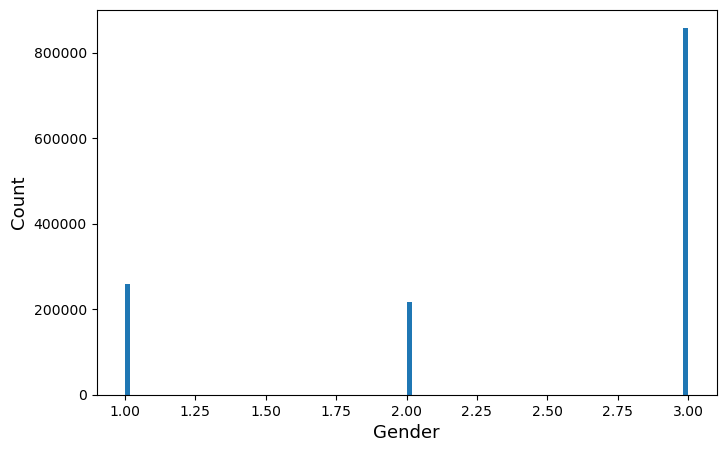

In [61]:
plt.figure(figsize=(8,5))
plt.hist(df_combined['Sex'], bins = 100 )
plt.ylabel("Count", size=13)
plt.xlabel("Gender", size=13)
plt.show()

Alright, let's check Age now

In [62]:
df_combined['Age'].value_counts()

Age
30 to 49            90018
18 to 29            82420
30-49               69363
18-29               61658
Under 18            44740
50 to 69            34526
50-69               32389
17 and under        26386
Total (pre-2009)    20767
70+                  9766
70 and over          6184
Unknown               699
under 18               25
Name: count, dtype: int64

OK let's run a loop so we can consolidate age into difference ranges, we'll define it as standarize_age

Then apply the function to the 'Age' column

In [63]:
def standardize_age(age):
    if age in ["Under 18", "17 and under"]:
        return "Under 18"
    elif age in ["18 to 29", "18-29"]:
        return "18 to 29"
    elif age in ["30 to 49", "30-49"]:
        return "30 to 49"
    elif age in ["50 to 69", "50-69"]:
        return "50 to 69"
    elif age in ["70+", "70 and over"]:
        return "70+"
    elif age in ["Unknown", "Unknown Age", "Total (pre-2009)"]:
        return "Unknown"
    else:
        return "Unknown"  # Default case if the age doesn't match

df_combined['Age'] = df_combined['Age'].apply(standardize_age)

C:\Users\patri\AppData\Local\Temp\ipykernel_17372\1971662299.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Age'] = df_combined['Age'].apply(standardize_age)


Checking

In [64]:
df_combined['Age'].value_counts()

Age
Unknown     874450
30 to 49    159381
18 to 29    144078
Under 18     71126
50 to 69     66915
70+          15950
Name: count, dtype: int64

OK let's check distribution for age now

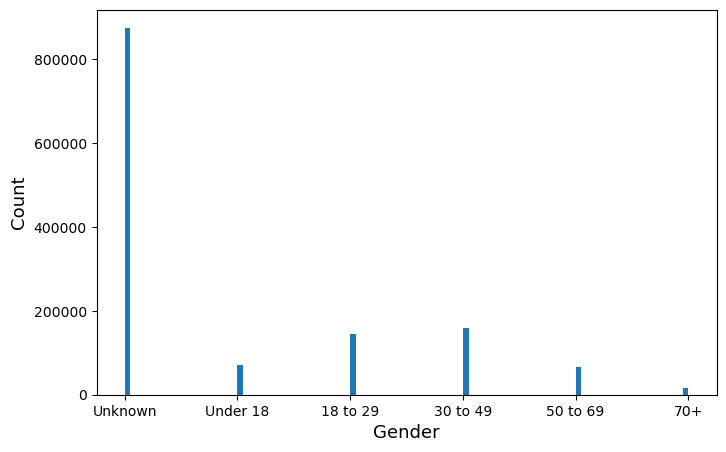

In [65]:
plt.figure(figsize=(8,5))
plt.hist(df_combined['Age'], bins = 100 )
plt.ylabel("Count", size=13)
plt.xlabel("Gender", size=13)
plt.show()

Looks to follow a normal distribution

We can further refine it later.

Now let's look at case outcome, one of our main dependent variables.

<div id='Case_Outcome'></div>

### Notable Observation: Case Outcome

In [66]:
df_combined['Case outcome'].value_counts()

Case outcome
Issued                                                                           201864
Refused                                                                          103428
Withdrawn                                                                         39087
Other Refusals                                                                    32983
Refugee Permission                                                                22699
Certified Refusal                                                                  9924
Explicit withdrawal                                                                9510
Lapsed                                                                             8491
Implicit withdrawal                                                                6579
3rd Country Refusal                                                                5752
Discretionary Leave                                                                5086
Total (pre-2010)   

OK have a lot of different categories, we need to map them together and consolidate it so we can make better sense of the data

In [69]:
outcome_mapping = {
    'Issued': [
        'Issued', 
        'Humanitarian Protection', 
        'Discretionary Leave',
        'Exceptional Leave to Remain',
        'UASC Leave',
        'Calais Leave'
    ],
    'Refused': [
        'Refused', 
        'Certified Refusal', 
        '3rd Country Refusal', 
        'Non-Compliance Refusal',
        'Other Refusals',
        'Other refusals'  
    ],
    'Withdrawn': [
        'Withdrawn', 
        'Lapsed', 
        'Explicit withdrawal', 
        'Implicit withdrawal',
        'Other Withdrawal',
        'Other withdrawal' 
    ],
    'Resettlements': [
        'Resettlement - Gateway Protection Programme',
        'Resettlement - UK Resettlement Scheme',
        'Resettlement - Vulnerable Children Resettlement Scheme',
        'Resettlement - Vulnerable Persons Resettlement Scheme',
        'Resettlement - Community Sponsorship Scheme',
        'Resettlement - Mandate Scheme',
        'Resettlement - ACRS Pathway 1 - Settled accommodation',
        'Resettlement - ACRS Pathway 2 - Settled accommodation',
        'Resettlement - ACRS Pathway 3 - Settled accommodation',
        'Relocation - ARAP - Settled accommodation',
        'Resettlement - ACRS Pathway 1 - Settled accommodation - Community Sponsorship',
        'Resettlement - Afghan route not recorded - Accommodation not recorded',
        'Resettlement - ACRS Pathway 3 - Interim accommodation',
        'Resettlement - ACRS Pathway 2 - Settled accommodation - Community Sponsorship',
        'Resettlement - Afghan route not recorded - Settled accommodation',
        'Relocation - ARAP - Interim accommodation',
        'Relocation - ARAP - Transitional accommodation',
        'Resettlement - ACRS Pathway 1 - Accommodation not recorded',
        'Resettlement - ACRS Pathway 1 - Interim accommodation',
        'Relocation - ARAP - Accommodation not recorded',
        'Resettlement - ACRS Pathway 3 - Transitional accommodation',
        'Resettlement - ACRS Pathway 3 - Accommodation not recorded'
    ],
    'Temporary Protection': [
        'Temporary Refugee Permission',
        'Refugee Permission'
    ],
    'Other Grants': [
        'Other Grants'  # Based on context, might need to reassess or find a more suitable main category
    ],
    'Total (pre-2010)': [
        'Total (pre-2010)'
    ]
}

#REF: ChatGPT

OK now, we want:

outcome_mapping = {
    'Issued': ['Issued', 'Humanitarian Protection'],
    'Refused': ['Refused', 'Certified Refusal']
}


To look like in a broader category:

inverted_mapping = {
    'Issued': 'Issued',
    'Humanitarian Protection': 'Issued',
    'Refused': 'Refused',
    'Certified Refusal': 'Refused'
}

Then we can map it


First we create an empty dictionary, then we loop for case_outcome in the outcome_mapping applied above within the list

Applying this mapping to to 'Case outcome'

In [70]:
inverted_mapping = {}

for case_cat, case_outcomes in outcome_mapping.items():
    for specific_outcome in case_outcomes:
        inverted_mapping[specific_outcome] = case_cat

#REF: https://stackoverflow.com/questions/483666/reverse-invert-a-dictionary-mapping?page=2&tab=scoredesc

In [71]:
df_combined['Case outcome'] = df_combined['Case outcome'].map(inverted_mapping).fillna(df_combined['Case outcome'])

C:\Users\patri\AppData\Local\Temp\ipykernel_17372\2686088770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Case outcome'] = df_combined['Case outcome'].map(inverted_mapping).fillna(df_combined['Case outcome'])


OK checking if it worked

In [72]:
df_combined['Case outcome'].value_counts()

Case outcome
Issued                  211351
Refused                 156773
Withdrawn                65454
Temporary Protection     22775
Resettlements             3958
Total (pre-2010)          3928
Other Grants              2921
Name: count, dtype: int64

Minor mapping adjustmenet: going to move 'Total (pre-2010)' to 'Issued' using .replace

In [73]:
df_combined['Case outcome'] = df_combined['Case outcome'].replace('Total (pre-2010)', 'Issued')

C:\Users\patri\AppData\Local\Temp\ipykernel_17372\2784780062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Case outcome'] = df_combined['Case outcome'].replace('Total (pre-2010)', 'Issued')


Check

In [74]:
df_combined['Case outcome'].value_counts()

Case outcome
Issued                  215279
Refused                 156773
Withdrawn                65454
Temporary Protection     22775
Resettlements             3958
Other Grants              2921
Name: count, dtype: int64

OK let's plot this to see the distribution, grouping by year for Case outcome

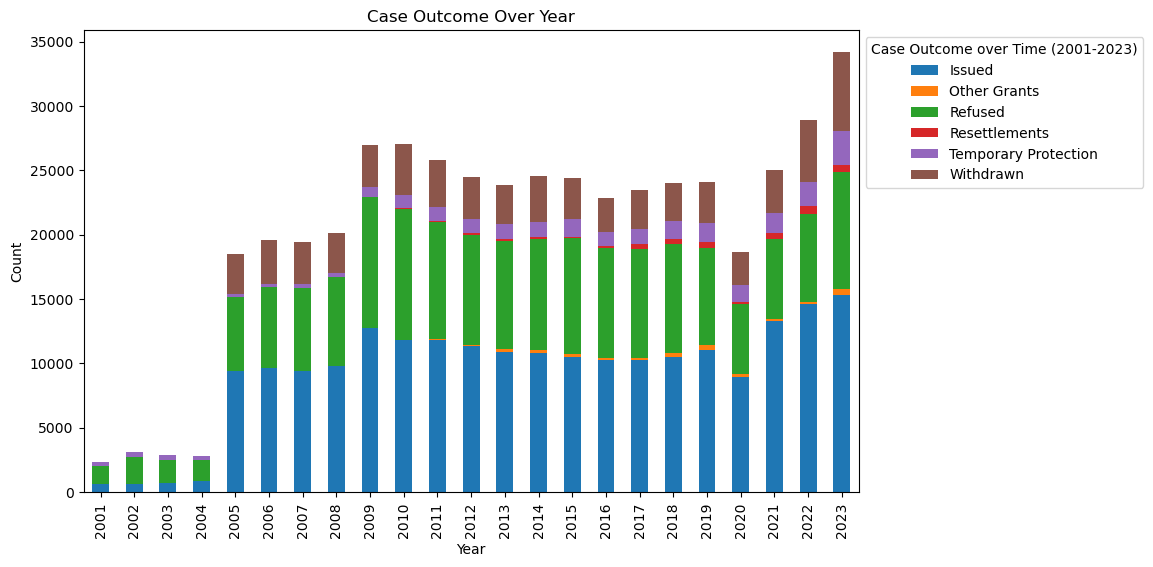

In [76]:
import matplotlib.pyplot as plt

outcome_counts = df_combined.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

outcome_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Case Outcome Over Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome over Time (2001-2023)', bbox_to_anchor=(1, 1))
plt.show()

Looks good but let's normalize it to see improved so the information is made consistent and errors are removed

Through a similar format so that it's easier to interpret and use

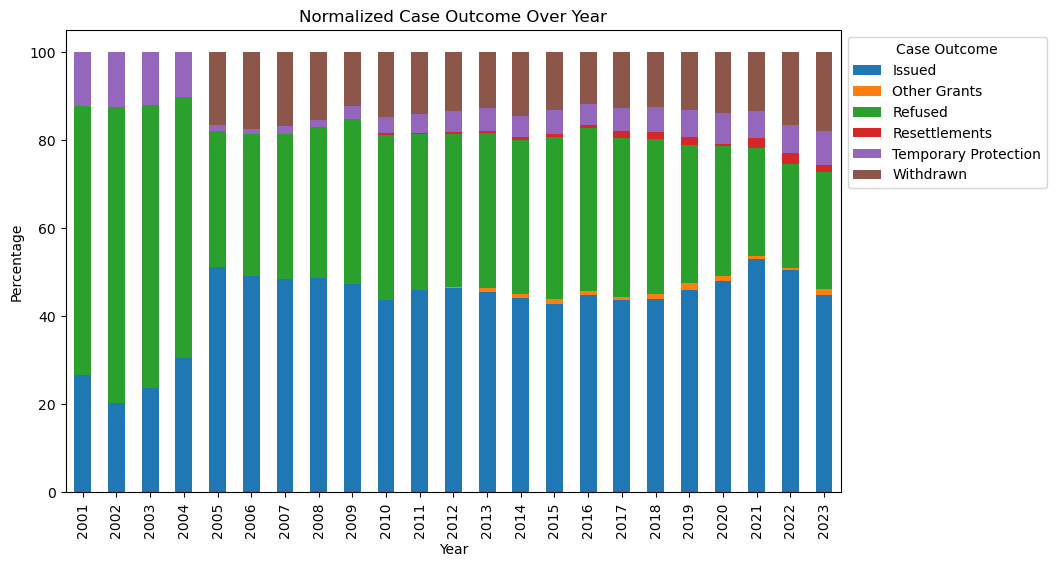

In [77]:
import matplotlib.pyplot as plt

outcome_counts = df_combined.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Normalize by row (percentage of each year's total)
outcome_counts_norm_row = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Normalize by column (percentage of each case outcome's total)
outcome_counts_norm_col = outcome_counts.div(outcome_counts.sum(axis=0), axis=1) * 100

# Ploting
outcome_counts_norm_row.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Case Outcome Over Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.show()

We can see that there was a jump in immigration across the board in 2004 and 2005, and this was due to an election which meaningfully changed policies


REF: https://www.encyclopedia.com/humanities/applied-and-social-sciences-magazines/uk-immigration-and-2005-general-election

Let's look at 'Case outcome group'

In [78]:
df_combined['Case outcome group'].value_counts()

Case outcome group
Refused                 53345
Grant of Protection     29688
Withdrawn               21804
Grant of Other Leave     9453
Name: count, dtype: int64

Let's look at the relationship of 'Nationality' and 'Case outcome'

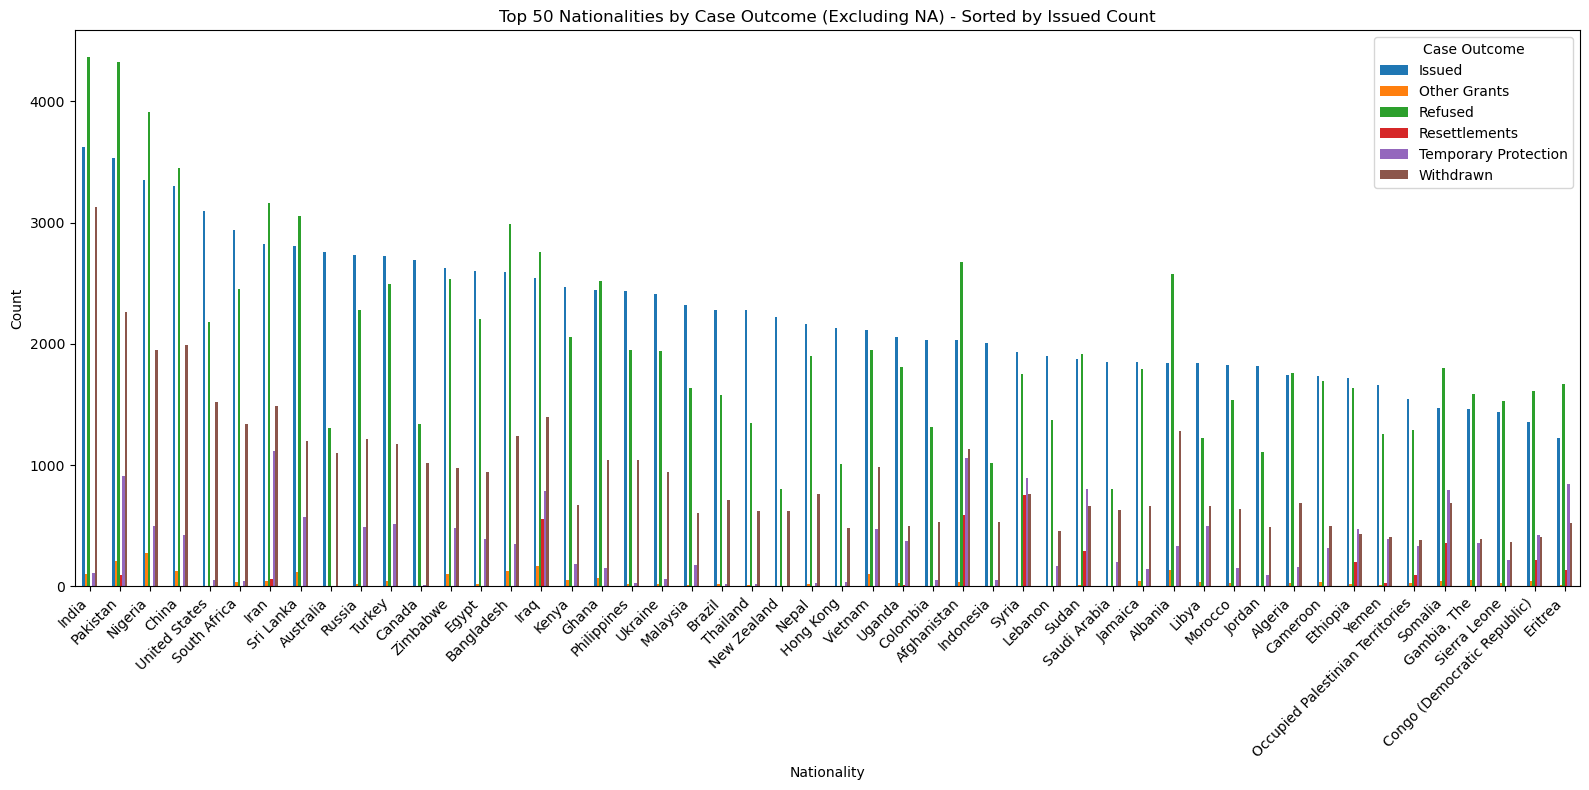

In [79]:
grouped_counts = df_combined.groupby(['Nationality', 'Case outcome']).size().unstack(fill_value=0)

# Get the top 50 nationalities by total count across all case outcomes
top_50_nationalities = grouped_counts.sum(axis=1).nlargest(50).index

# Filter the grouped counts dataframe to include only the top 50 nationalities
grouped_counts_top_50 = grouped_counts.loc[top_50_nationalities]

# Sort the data by the "Issued" count in descending order
grouped_counts_top_50_sorted = grouped_counts_top_50.sort_values(by='Issued', ascending=False)

# Plot the sorted data
grouped_counts_top_50_sorted.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Top 50 Nationalities by Case Outcome (Excluding NA) - Sorted by Issued Count')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

A bit noisy but we can notice that certain countries that are autocratic have higher levels of refused or resettlements. Let's look at Iraq as an example

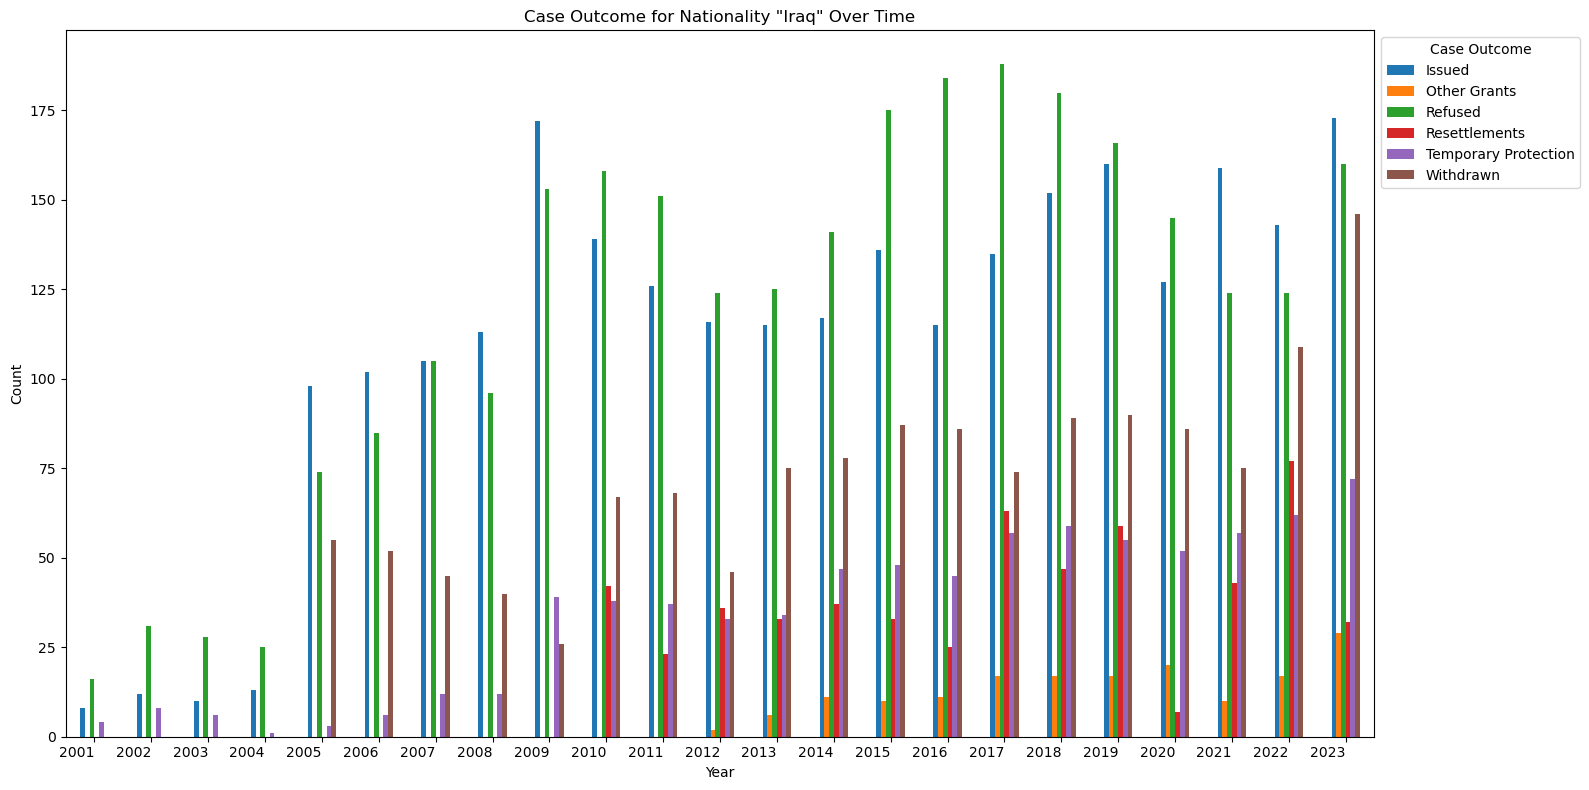

In [80]:
filtered_df_iraq = df_combined[(df_combined['Nationality'] == 'Iraq') & (df_combined['Case outcome'] != 'Other.NA')]

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
grouped_counts_iraq = filtered_df_iraq.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
grouped_counts_iraq.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Case Outcome for Nationality "Iraq" Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

OK we can see that each country tells a different story. For Iraq, there was a war between 2003-2011. US troops offically withdrew in 2011

REF: https://en.wikipedia.org/wiki/Iraq_War

Let's look at Syria as well

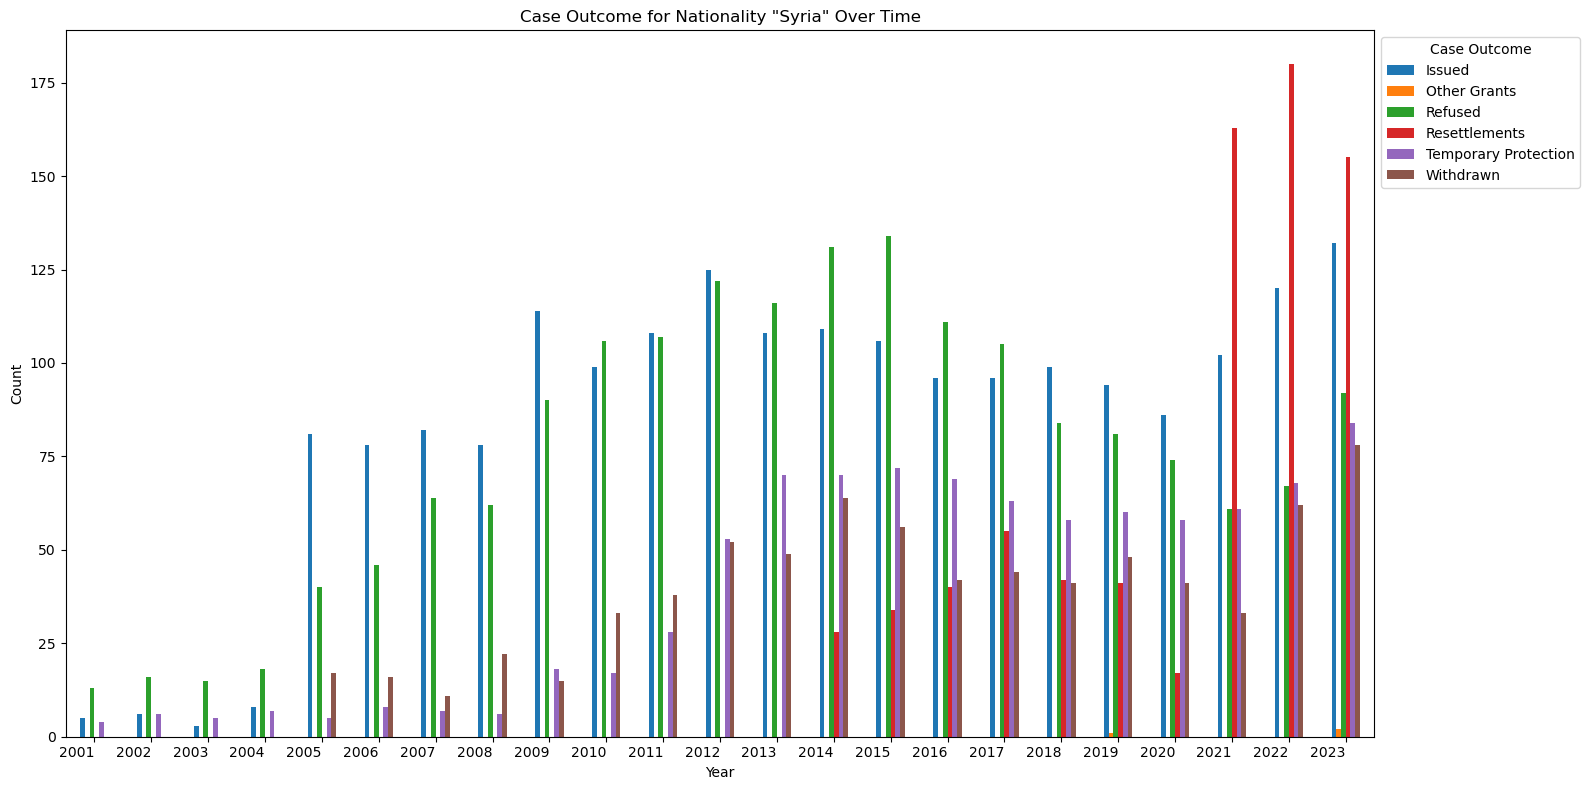

In [81]:
filtered_df_syria = df_combined[(df_combined['Nationality'] == 'Syria') & (df_combined['Case outcome'] != 'Other.NA')]
grouped_counts_syria = filtered_df_syria.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
grouped_counts_syria.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Case Outcome for Nationality "Syria" Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

With this we can see that resettlements really picked up in 2024, with a significant increase in 2021-2023

Again, the conflict began a few years prior to the numbers jumping up

In March 2011, popular discontent with the rule of Bashar al-Assad triggered large-scale protests and pro-democracy rallies across Syria, as part of the wider Arab Spring protests in the region. After months of crackdown by governments security apparatus, various armed rebel groups such as the Free Syrian Army began forming across the country, marking the beginning of the Syrian insurgency. By mid-2012, the crisis had escalated into a full-blown civil war.

Receiving arms from NATO and GCC states, rebel forces initially made significant advances against the government forces, who were receiving arms from Iran and Russia. Rebels captured the regional capitals of Raqqa in 2013 and Idlib in 2015. Consequently, in September 2015, Russia launched a military intervention in support of the government, shifting the balance of the conflict. By late 2018, all rebel strongholds, except parts of Idlib region, had fallen to the government forces. 

REF: https://en.wikipedia.org/wiki/Syrian_civil_war

OK let's continue to look at top 50 nationalies and their shapes, and let's see if we can come up with a ratio

In [82]:
# Step 1: Filter the dataframe to include only the top 50 nationalities
top_50_nationalities = df_combined['Nationality'].value_counts().head(50).index

# Adjusted Step 2: Includes counts for new categories
rejection_data = []
for nationality in top_50_nationalities:
    nationality_data = df_combined[df_combined['Nationality'] == nationality]
    refused_count = nationality_data[nationality_data['Case outcome'] == 'Refused'].shape[0]
    withdrawn_count = nationality_data[nationality_data['Case outcome'] == 'Withdrawn'].shape[0]
    issued_count = nationality_data[nationality_data['Case outcome'] == 'Issued'].shape[0]
    refugee_permission_count = nationality_data[nationality_data['Case outcome'] == 'Refugee Permission'].shape[0]
    temporary_protection_count = nationality_data[nationality_data['Case outcome'] == 'Temporary Protection'].shape[0]
    resettlements_count = nationality_data[nationality_data['Case outcome'] == 'Resettlements'].shape[0]
    other_grants_count = nationality_data[nationality_data['Case outcome'] == 'Other Grants'].shape[0]

    # Adjusted Step 3: Calculate total - issued, refugee permission, temporary protection, resettlements, and other grants
    total_positive_outcomes = issued_count + refugee_permission_count + temporary_protection_count + resettlements_count + other_grants_count

    # Step 4: Remains the same - Calculates total - total refused + withdrawn
    total_refused_withdrawn = refused_count + withdrawn_count
    
    # Adjusted Step 5: Calculate the rejection ratio based on new total
    if total_positive_outcomes > 0:  # Prevent division by zero
        rejection_ratio = round((refused_count / total_positive_outcomes), 2)
    else:
        rejection_ratio = 0

    # Adjusted Step 6: Calculate the total rejection ratio (including withdrawals) based on new total
    if total_positive_outcomes > 0:  # Prevent division by zero
        total_rejection_ratio = round((total_refused_withdrawn / total_positive_outcomes), 2)
    else:
        total_rejection_ratio = 0
    
    # Step 7: Append the adjusted data to the list
    rejection_data.append((nationality, refused_count, withdrawn_count, issued_count, refugee_permission_count, temporary_protection_count, resettlements_count, other_grants_count, total_positive_outcomes, rejection_ratio, total_rejection_ratio))

# Adjusted columns to display the new outcomes
rejection_df = pd.DataFrame(rejection_data, columns=['Nationality', 'Refused', 'Withdrawn', 'Issued', 'Refugee Permission', 'Temporary Protection', 'Resettlements', 'Other Grants', 'Total Positive Outcomes', 'Rejection Ratio', 'Total Rejection Ratio'])
print(rejection_df)


#REF: Chatgpt

      Nationality  Refused  Withdrawn  Issued  Refugee Permission  \
0           India     4368       3128    3621                   0   
1        Pakistan     4324       2261    3535                   0   
2   United States     2178       1521    3094                   0   
3         Nigeria     3912       1950    3355                   0   
4           China     3450       1988    3301                   0   
5    South Africa     2455       1344    2939                   0   
6          Turkey     2495       1174    2728                   0   
7       Sri Lanka     3052       1199    2808                   0   
8          Brazil     1581        712    2283                   0   
9          Russia     2280       1216    2735                   0   
10           Iran     3164       1491    2825                   0   
11     Bangladesh     2990       1240    2590                   0   
12      Australia     1305       1104    2757                   0   
13    Philippines     1952       1

OK let's plot this for rejection ration (issued+refugee permission)

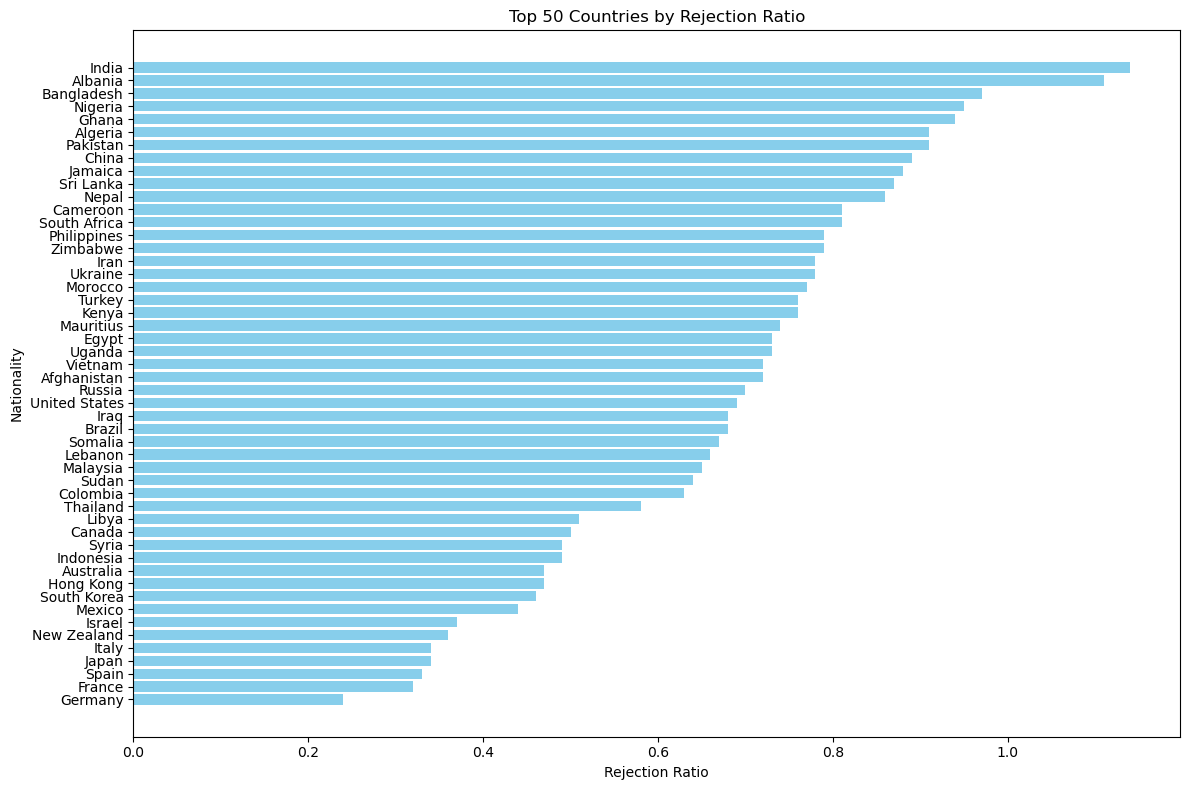

In [83]:
rejection_df_sorted = rejection_df.sort_values(by='Rejection Ratio', ascending=False)

# Select the top 50 countries
top_50_rejection = rejection_df_sorted.head(50)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_50_rejection['Nationality'], top_50_rejection['Rejection Ratio'], color='skyblue')
plt.xlabel('Rejection Ratio')
plt.ylabel('Nationality')
plt.title('Top 50 Countries by Rejection Ratio')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


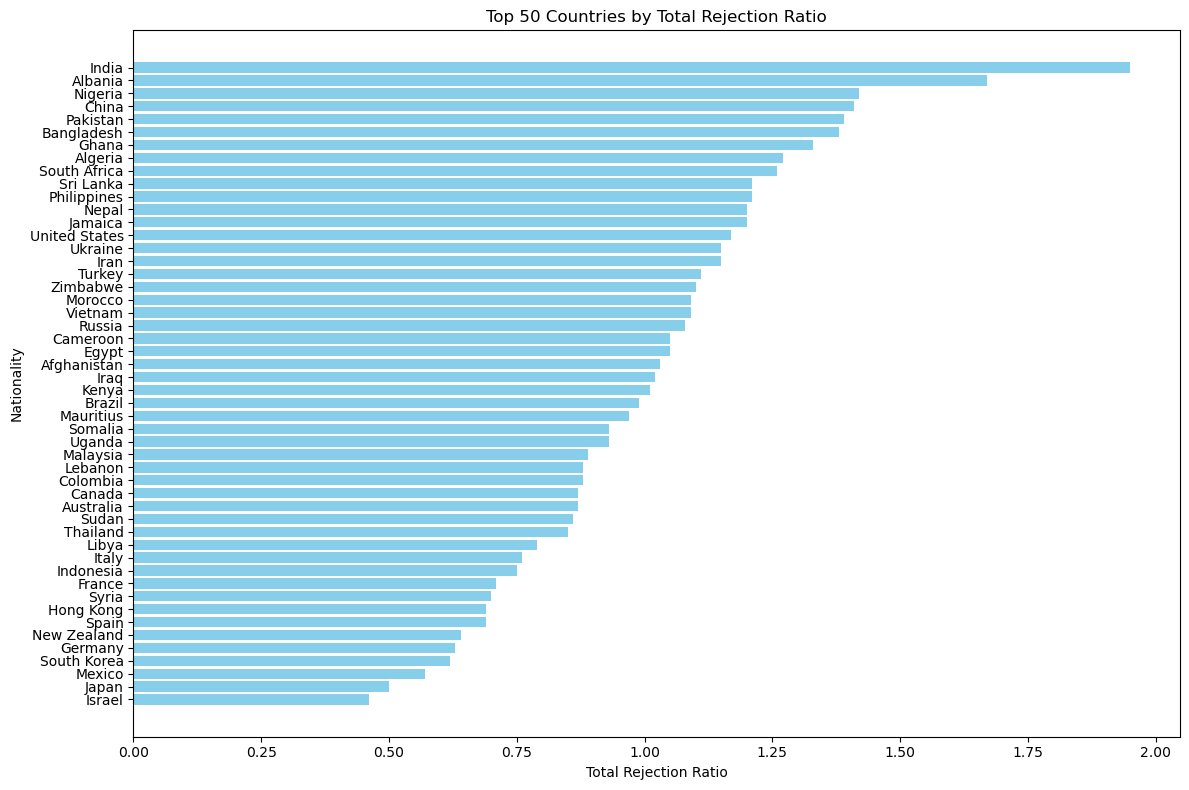

In [84]:
# Sort the rejection data by total rejection ratio 
rejection_df_sorted = rejection_df.sort_values(by='Total Rejection Ratio', ascending=False)

# Select the top 50 countries
top_50_rejection = rejection_df_sorted.head(50)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(top_50_rejection['Nationality'], top_50_rejection['Total Rejection Ratio'], color='skyblue')
plt.xlabel('Total Rejection Ratio')
plt.ylabel('Nationality')
plt.title('Top 50 Countries by Total Rejection Ratio')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest total rejection ratio at the top
plt.tight_layout()
plt.show()


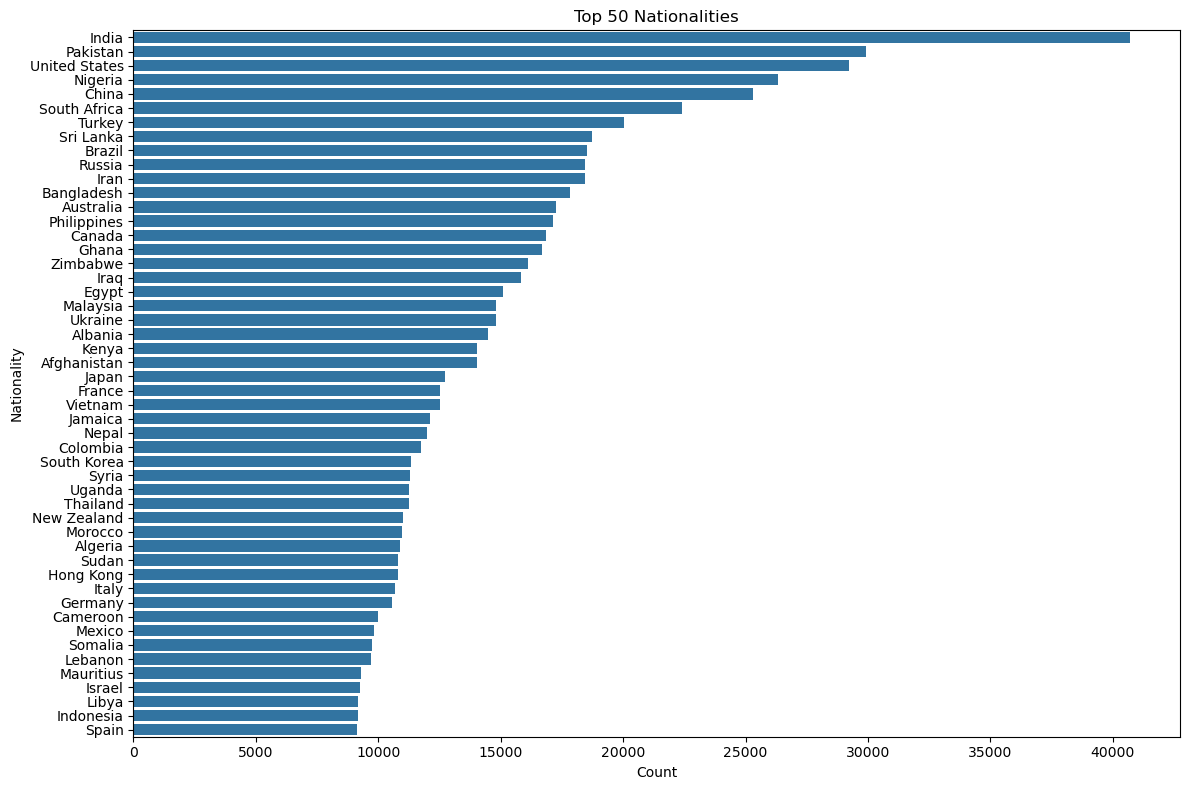

In [85]:
import seaborn as sns

# Filter to include only the top 50 nationalities
top_50_nationalities = df_combined['Nationality'].value_counts().head(50).index
filtered_df = df_combined[df_combined['Nationality'].isin(top_50_nationalities)]

# Set the size of the plot
plt.figure(figsize=(12, 8))

sns.countplot(y='Nationality', data=filtered_df, order=filtered_df['Nationality'].value_counts().index)

plt.title('Top 50 Nationalities')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.tight_layout()
plt.show()


<div id='Decisions_Grants'></div>

### Decisions and Grants

Let's look at 'Decisions' and 'Grants.' Starting with 'Decisions'

In [86]:
df_combined['Decisions'].value_counts()

Decisions
1.0        158231
2.0         62722
3.0         36128
4.0         24357
5.0         17282
            ...  
2631.0          1
2745.0          1
3383.0          1
15344.0         1
3421.0          1
Name: count, Length: 4887, dtype: int64

Let's look at the distribution. We need to log the y scale to make sense out of the data

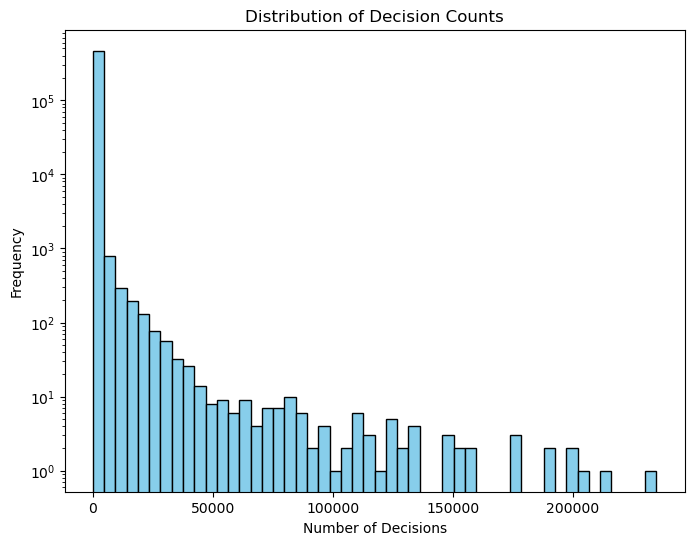

In [87]:
plt.figure(figsize=(8, 6))
plt.hist(df_combined['Decisions'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Decisions')
plt.ylabel('Frequency')
plt.title('Distribution of Decision Counts')
plt.yscale('log') 
plt.show()

Let's fill 'Decisions' nas with 0s if there is no data. We can decide to interate later if neccesary

In [88]:
df_combined['Decisions'] = pd.to_numeric(df_combined['Decisions'], errors='coerce').fillna(0)

C:\Users\patri\AppData\Local\Temp\ipykernel_17372\1304701884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Decisions'] = pd.to_numeric(df_combined['Decisions'], errors='coerce').fillna(0)


Check

In [89]:
df_combined['Decisions'].value_counts()

Decisions
0.0        864740
1.0        158231
2.0         62722
3.0         36128
4.0         24357
            ...  
2631.0          1
2745.0          1
3383.0          1
15344.0         1
3421.0          1
Name: count, Length: 4888, dtype: int64

Looking for 'Grants' now. Same logic

In [90]:
df_combined['Grants'].value_counts()

Grants
1.0       98358
2.0       30025
3.0       15859
4.0       10313
5.0        7678
          ...  
1114.0        1
794.0         1
855.0         1
1288.0        1
2203.0        1
Name: count, Length: 1063, dtype: int64

Looking at distribution, logged

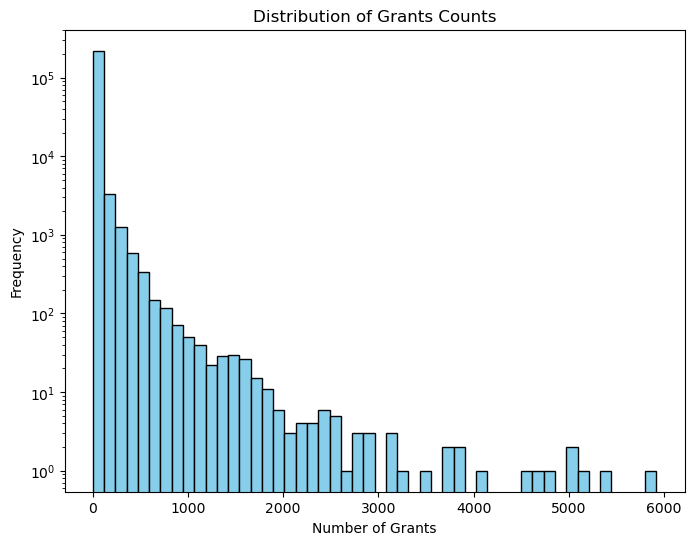

In [91]:
plt.figure(figsize=(8, 6))
plt.hist(df_combined['Grants'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Grants')
plt.ylabel('Frequency')
plt.title('Distribution of Grants Counts')
plt.yscale('log')
plt.show()


Filling with 0 again

In [92]:
df_combined['Grants'] = pd.to_numeric(df_combined['Grants'], errors='coerce').fillna(0)

C:\Users\patri\AppData\Local\Temp\ipykernel_17372\2233350397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Grants'] = pd.to_numeric(df_combined['Grants'], errors='coerce').fillna(0)


Ok 'Grants' is fairly small in comparison to decisions. Let's graph both together to confirm:

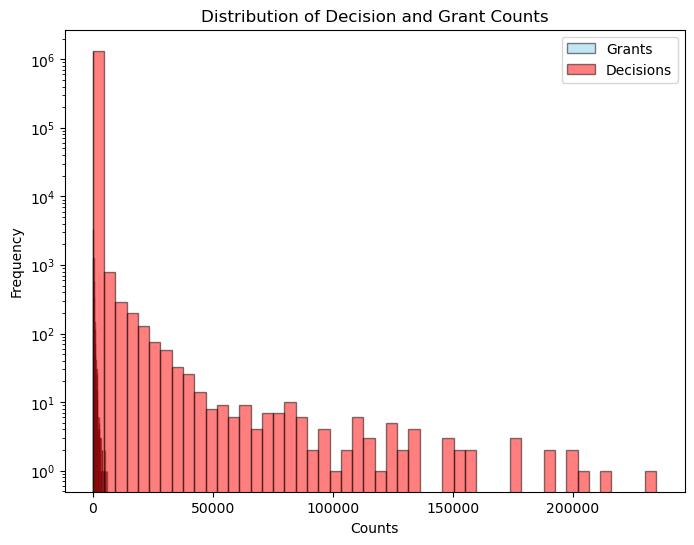

In [93]:
plt.figure(figsize=(8, 6))

# Plotting both distributions on the same histogram for comparison
plt.hist(df_combined['Grants'], bins=50, color='skyblue', edgecolor='black', alpha=0.5, label='Grants')
plt.hist(df_combined['Decisions'], bins=50, color='red', edgecolor='black', alpha=0.5, label='Decisions')

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Decision and Grant Counts')
plt.yscale('log')
plt.legend()
plt.show()


OK it is very small. 

OK We have to look at 'Applications', we forgot about that. This is probably another useful int column.

In [94]:
df_combined['Applications'].value_counts()

Applications
1.0        121480
2.0         43788
3.0         24939
4.0         16901
5.0         12507
            ...  
2383.0          1
13638.0         1
2396.0          1
18275.0         1
2758.0          1
Name: count, Length: 5277, dtype: int64

Same logic again, let's look at the distribution then fill for 0s

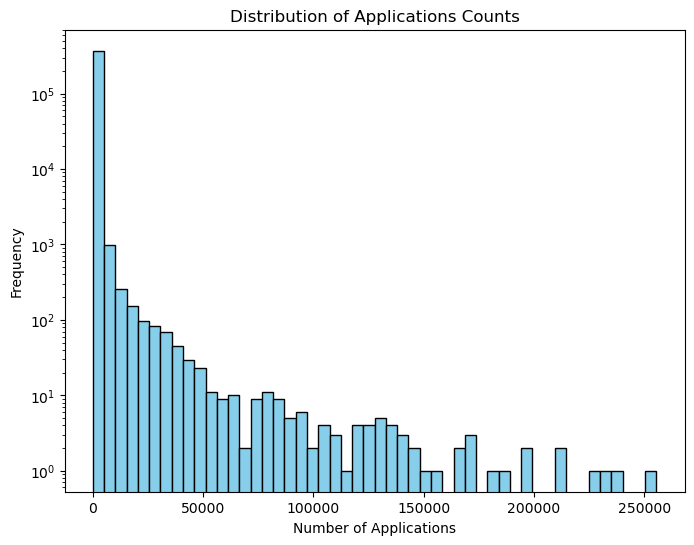

In [95]:
plt.figure(figsize=(8, 6))
plt.hist(df_combined['Applications'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Applications')
plt.ylabel('Frequency')
plt.title('Distribution of Applications Counts')
plt.yscale('log')
plt.show()

In [96]:
df_combined['Applications'] = pd.to_numeric(df_combined['Applications'], errors='coerce').fillna(0)

C:\Users\patri\AppData\Local\Temp\ipykernel_17372\1658246509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Applications'] = pd.to_numeric(df_combined['Applications'], errors='coerce').fillna(0)


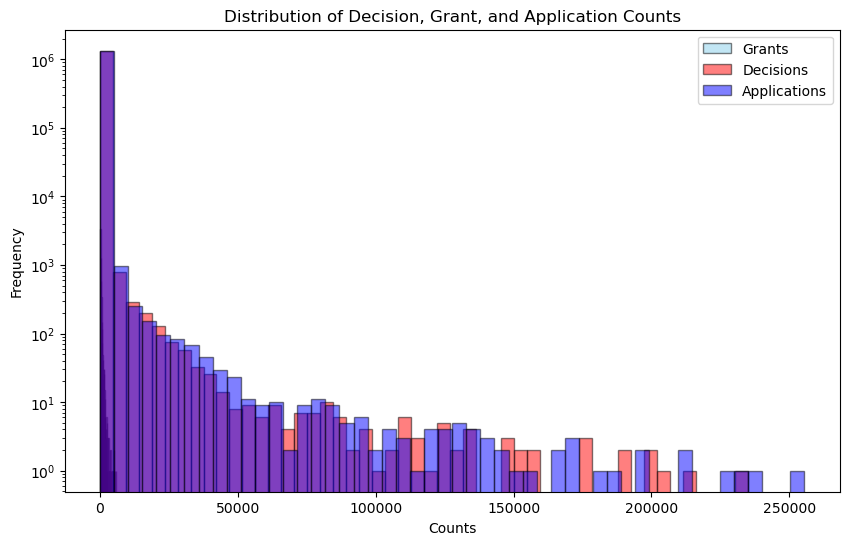

In [97]:
plt.figure(figsize=(10, 6))

# Plotting both distributions on the same histogram for comparison
plt.hist(df_combined['Grants'], bins=50, color='skyblue', edgecolor='black', alpha=0.5, label='Grants')
plt.hist(df_combined['Decisions'], bins=50, color='red', edgecolor='black', alpha=0.5, label='Decisions')
plt.hist(df_combined['Applications'], bins=50, color='blue', edgecolor='black', alpha=0.5, label='Applications')

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Decision, Grant, and Application Counts')
plt.yscale('log')
plt.legend()
plt.show()

OK looks to be decent data distribution for now. We can look at some more advanced enginnering later

<div id='Applications'></div>

### Applications

Now let's look at 'Application type group'

In [98]:
df_combined['Application type group'].value_counts()

Application type group
Naturalisation    106556
Registration       55783
Name: count, dtype: int64

OK this might not be that useful but lets see if there are any nulls with "issued" in case outcome, maybe we can fill these out a bit

In [99]:
df_combined['Application type group'].value_counts()

Application type group
Naturalisation    106556
Registration       55783
Name: count, dtype: int64

We don't need this. Can drop

In [100]:
df_combined.drop(columns=['Application type group'], inplace=True)

C:\Users\patri\AppData\Local\Temp\ipykernel_17372\2335316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.drop(columns=['Application type group'], inplace=True)


Let's check out 'Application type'

In [101]:
df_combined['Application type'].value_counts()

Application type
Naturalisation based on residence    51275
Naturalisation based on marriage     34862
Registration of minor children       23387
Registration on other grounds        15074
Name: count, dtype: int64

Let's look into 'Applicant type', not to be confused with Application type!

In [103]:
df_combined['Applicant type'].value_counts()

Applicant type
Main Applicant        316536
All                   211872
Dependant             142842
Main applicant          9782
Resettlement - N/A      3958
Name: count, dtype: int64

<div id='Return_Type'></div>

### Return Type

In [104]:
df_combined['Return type'].value_counts()

Return type
Departed from UK Ports               50607
Other verified returns               49993
Controlled returns                   35503
Departed from Juxtaposed controls    26264
Assisted returns                     16400
Enforced removals from detention     15806
Enforced removals                    15657
N/A - pre-2007                       14511
Not available                         5334
Other returns from detention          5076
Non-detained Enforced removals        3728
Non-detained enforced removals        1174
Name: count, dtype: int64

Some of these might be useful later. Let's map together some that are similar, as well as the unknowns, and set the rest to 0.

In [105]:
return_type_mapping = {
    'Verified Returns': [
        'Departed from UK Ports',
        'Other verified returns',
        'Controlled returns',
        'Departed from Juxtaposed controls'
    ],
    'Assisted Returns': [
        'Assisted returns'
    ],
    'Enforced Removals': [
        'Enforced removals',
        'Enforced removals from detention',
        'Non-detained Enforced removals',
        'Non-detained enforced removals'
    ],
    'Other Returns': [
        'Other returns from detention'
        'N/A - pre-2007',
        'Not available'
    ]
}

# Invert the dictionary to map specific outcomes to the broad categories
inverted_return_mapping = {specific: broad for broad, specifics in return_type_mapping.items() for specific in specifics}

# Apply the inverted mapping to the 'Return type' column, filling in unlisted values with their original values
df_combined['Return type'] = df_combined['Return type'].map(inverted_return_mapping).fillna(df_combined['Return type'])

# REF: ChatGPT

C:\Users\patri\AppData\Local\Temp\ipykernel_17372\1077467010.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Return type'] = df_combined['Return type'].map(inverted_return_mapping).fillna(df_combined['Return type'])


Check

In [106]:
df_combined['Return type'].value_counts()

Return type
Verified Returns                162367
Enforced Removals                36365
Assisted Returns                 16400
N/A - pre-2007                   14511
Other Returns                     5334
Other returns from detention      5076
Name: count, dtype: int64

OK now look at 'Return type group'

In [107]:
df_combined['Return type group'].value_counts()

Return type group
Voluntary return                                   101896
Refused entry at port and subsequently departed     96716
Enforced return                                     41441
Name: count, dtype: int64

Now let's look at 'Return destination group'

In [108]:
df_combined['Return destination group'].value_counts()

Return destination group
Home country       95511
EU Member State    67917
Other country      52484
Home Country       24141
Name: count, dtype: int64

Looks fine. Leave for now

Let's check out 'Number of returns'

In [109]:
df_combined['Number of returns'].value_counts()

Number of returns
1.0      124887
2.0       40559
3.0       20015
4.0       11720
5.0        7907
          ...  
229.0         1
179.0         1
305.0         1
399.0         1
340.0         1
Name: count, Length: 330, dtype: int64

Let's look at the distribution

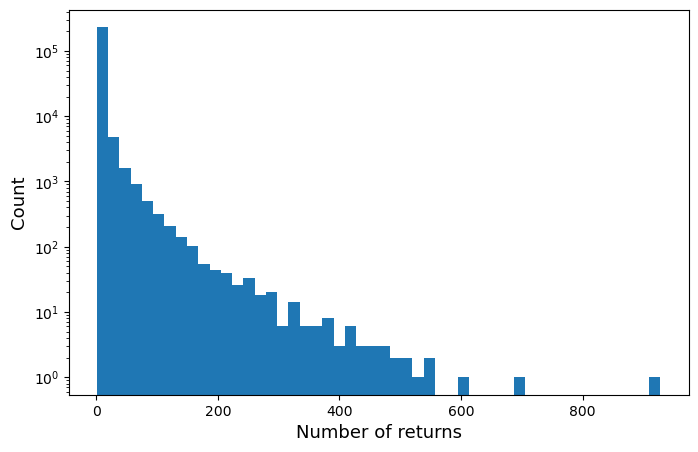

In [110]:
plt.figure(figsize=(8,5))
plt.hist(df_combined['Number of returns'], bins = 50 )
plt.yscale('log')
plt.ylabel("Count", size=13)
plt.xlabel("Number of returns", size=13)
plt.show()

<div id='Host_Country'></div>

### Host Country

OK now let's look at 'Host Country'

In [111]:
df_combined['Host Country'].value_counts()

Host Country
Asylum case - N/A                   110332
Resettlement (Pre-2021 Q1) - N/A      2215
Afghan resettlement case - N/A         525
Egypt                                  235
Jordan                                 181
Lebanon                                179
Turkey                                 174
Iraq                                   138
Kenya                                   50
Malaysia                                43
Other and unknown                       40
Syria                                   36
Iran                                    36
Thailand                                26
Indonesia                               20
Sri Lanka                               18
India                                   11
Pakistan                                 8
Niger                                    7
Burundi                                  7
Kyrgyzstan                               3
Gambia                                   2
Tunisia                                  

Lets drop this. No value, we have all this in 'Nationality'

In [112]:
df_combined.drop(columns=['Host Country'], inplace=True)

C:\Users\patri\AppData\Local\Temp\ipykernel_17372\4251357513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.drop(columns=['Host Country'], inplace=True)


<div id='Industry_Jobs'></div>

### Industry and Jobs

Now let's look at Industry and Jobs

In [113]:
df_combined['Industry'].value_counts()

Industry
Professional, Scientific and Technical Activities                                        33869
Education                                                                                18156
Financial and Insurance Activities                                                       17503
Human Health and Social Work Activities                                                  17008
Manufacturing                                                                            16945
Information and Communications                                                           16665
Arts, Entertainment and Recreation                                                       14309
Administrative and Support Service Activities                                             8729
Other Service Activities                                                                  8591
Wholesale and retail trade; repair of motor vehicles and motorcycles                      8079
Construction                             

In [114]:
# Convert 'Industry' column to lowercase
df_combined['Industry'] = df_combined['Industry'].str.lower()

# Then get the value counts
industry_value_counts = df_combined['Industry'].value_counts()

print(industry_value_counts)


Industry
professional, scientific and technical activities                                        33869
education                                                                                18156
financial and insurance activities                                                       17503
human health and social work activities                                                  17008
manufacturing                                                                            16945
information and communications                                                           16665
arts, entertainment and recreation                                                       14309
administrative and support service activities                                             8956
other service activities                                                                  8591
wholesale and retail trade; repair of motor vehicles and motorcycles                      8079
construction                             

C:\Users\patri\AppData\Local\Temp\ipykernel_17372\1274577634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Industry'] = df_combined['Industry'].str.lower()


Let's look at occupation

In [115]:
df_combined['Occupation'].value_counts()

Occupation
2136 - Programmers and software development professionals        8416
2423 - Management consultants and business analysts              7535
3545 - Sales accounts and business development managers          6202
3534 - Finance and investment analysts and advisers              4837
2135 - IT business analysts, architects and systems designers    4800
                                                                 ... 
9239 - Elementary cleaning occupations n.e.c.                       2
1174 - Security managers                                            2
2422 - Management accountants                                       2
9259 - Elementary sales occupations n.e.c.                          1
9231 - Window cleaners                                              1
Name: count, Length: 324, dtype: int64

OK let's make lowercase as well

In [116]:
df_combined['Occupation'] = df_combined['Occupation'].str.lower()
occupation_value_counts = df_combined['Occupation'].value_counts()

print(occupation_value_counts)


Occupation
2136 - programmers and software development professionals        8416
2423 - management consultants and business analysts              7535
3545 - sales accounts and business development managers          6202
3534 - finance and investment analysts and advisers              4837
2135 - it business analysts, architects and systems designers    4800
                                                                 ... 
9239 - elementary cleaning occupations n.e.c.                       2
1174 - security managers                                            2
2422 - management accountants                                       2
9259 - elementary sales occupations n.e.c.                          1
9231 - window cleaners                                              1
Name: count, Length: 324, dtype: int64


C:\Users\patri\AppData\Local\Temp\ipykernel_17372\2050417035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Occupation'] = df_combined['Occupation'].str.lower()


Now 'Occ. sub-major group'

In [117]:
df_combined['Occ. sub-major group'].value_counts()

Occ. sub-major group
Science, Research, Engineering and Technology Professionals    45497
Business, Media and Public Service Professionals               32776
Business and Public Service Associate Professionals            28447
Corporate Managers and Directors                               21435
Culture, Media and Sports Occupations                          12095
Health Professionals                                           11615
Caring Personal Service Occupations                             5874
Textiles, Printing and Other Skilled Trades                     4216
Science, Engineering and Technology Associate Professionals     3829
Teaching and Educational Professionals                          3702
Health and Social Care Associate Professionals                  2954
Other Managers and Proprietors                                  2784
Administrative Occupations                                      2755
Skilled Metal, Electrical and Electronic Trades                 2732
Skilled Const

In [118]:
df_combined['Occ. sub-major group'] = df_combined['Occ. sub-major group'].str.lower()
sub_occ_value_counts = df_combined['Occ. sub-major group'].value_counts()

print(sub_occ_value_counts)


Occ. sub-major group
science, research, engineering and technology professionals    45497
business, media and public service professionals               32776
business and public service associate professionals            28447
corporate managers and directors                               21435
culture, media and sports occupations                          12095
health professionals                                           11615
caring personal service occupations                             5874
textiles, printing and other skilled trades                     4216
science, engineering and technology associate professionals     3829
teaching and educational professionals                          3702
health and social care associate professionals                  2954
other managers and proprietors                                  2784
administrative occupations                                      2755
skilled metal, electrical and electronic trades                 2732
skilled const

C:\Users\patri\AppData\Local\Temp\ipykernel_17372\3576095022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Occ. sub-major group'] = df_combined['Occ. sub-major group'].str.lower()


Same for minor

In [119]:
df_combined['Occ. minor group'].value_counts()

Occ. minor group
Information Technology and Telecommunications Professionals    20019
Business, Research and Administrative Professionals            17506
Engineering Professionals                                      15321
Sales, Marketing and Related Associate Professionals           13229
Business, Finance and Related Associate Professionals          11980
                                                               ...  
Conservation Associate Professionals                               2
Therapists                                                         2
Protective Service Officers                                        2
Business and Statistical Professionals                             2
Elementary Sales Occupations                                       1
Name: count, Length: 97, dtype: int64

In [120]:
df_combined['Occ. minor group'] = df_combined['Occ. minor group'].str.lower()
occ_minor_value_counts = df_combined['Occ. minor group'].value_counts()

print(occ_minor_value_counts)

Occ. minor group
information technology and telecommunications professionals    20019
business, research and administrative professionals            17506
engineering professionals                                      15321
sales, marketing and related associate professionals           13229
business, finance and related associate professionals          11980
                                                               ...  
conservation associate professionals                               2
therapists                                                         2
protective service officers                                        2
business and statistical professionals                             2
elementary sales occupations                                       1
Name: count, Length: 97, dtype: int64


C:\Users\patri\AppData\Local\Temp\ipykernel_17372\1906950345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Occ. minor group'] = df_combined['Occ. minor group'].str.lower()


And unit group

In [121]:
df_combined['Occ. unit group'].value_counts()

Occ. unit group
Programmers and software development professionals        8416
Management consultants and business analysts              7535
Sales accounts and business development managers          6202
Finance and investment analysts and advisers              4837
IT business analysts, architects and systems designers    4800
                                                          ... 
Security managers                                            2
Elementary cleaning occupations n.e.c.                       2
Sewing machinists                                            2
Elementary sales occupations n.e.c.                          1
Window cleaners                                              1
Name: count, Length: 320, dtype: int64

These jobs seem more specific. Let's lowercase as well

In [122]:
df_combined['Occ. unit group'] = df_combined['Occ. unit group'].str.lower()
occ_unit_counts = df_combined['Occ. unit group'].value_counts()

print(occ_unit_counts)

Occ. unit group
programmers and software development professionals        8416
management consultants and business analysts              7535
sales accounts and business development managers          6202
finance and investment analysts and advisers              4837
it business analysts, architects and systems designers    4800
                                                          ... 
security managers                                            2
elementary cleaning occupations n.e.c.                       2
sewing machinists                                            2
elementary sales occupations n.e.c.                          1
window cleaners                                              1
Name: count, Length: 320, dtype: int64


C:\Users\patri\AppData\Local\Temp\ipykernel_17372\417555828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Occ. unit group'] = df_combined['Occ. unit group'].str.lower()


Last one to get is occ. major, let's lowercase as well

In [123]:
df_combined['Occ. major group'].value_counts()

Occ. major group
Professional Occupations                            93598
Associate Professional and Technical Occupations    47471
Managers, Directors and Senior Officials            24219
Skilled Trades Occupations                           9756
Caring, Leisure and Other Service Occupations        6657
Administrative and Secretarial Occupations           3696
Elementary Occupations                               1582
Sales and Customer Service Occupations               1303
Process, Plant and Machine Operatives                 443
Personal Service Occupations                           10
Managers and Senior Officials                           6
Name: count, dtype: int64

In [124]:
df_combined['Occ. major group'] = df_combined['Occ. major group'].str.lower()
occ_unit_counts = df_combined['Occ. major group'].value_counts()

print(occ_unit_counts)

Occ. major group
professional occupations                            93598
associate professional and technical occupations    47471
managers, directors and senior officials            24219
skilled trades occupations                           9756
caring, leisure and other service occupations        6657
administrative and secretarial occupations           3696
elementary occupations                               1582
sales and customer service occupations               1303
process, plant and machine operatives                 443
personal service occupations                           10
managers and senior officials                           6
Name: count, dtype: int64


C:\Users\patri\AppData\Local\Temp\ipykernel_17372\4230446895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Occ. major group'] = df_combined['Occ. major group'].str.lower()


OK we can move on from this book. Saving as df_combined_EDA1.csv

We will continue in book 2

In [125]:
df_combined.to_csv('C:/Users/patri/Downloads/df_combined_Book 1_EDA1.csv', index=False)